# Challenge: Analyzing Text about Data Science

In this example, let's do a simple exercise that covers all steps of a traditional data science process. You do not have to write any code, you can just click on the cells below to execute them and observe the result. As a challenge, you are encouraged to try this code out with different data. 

## Goal

In this lesson, we have been discussing different concepts related to Data Science. Let's try to discover more related concepts by doing some **text mining**. We will start with a text about Data Science, extract keywords from it, and then try to visualize the result.

As a text, I will use the page on Data Science from Wikipedia:

In [17]:
url = 'https://en.wikipedia.org/wiki/Anime'

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [18]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Anime - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ad9818f4-10b3-451a-87a3-e614f22a12ab","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Anime","wgTitle":"Anime","wgCurRevisionId":1101637502,"wgRevisionId":1101637502,"wgArticleId":800,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","Articles containing Japanese-language text","CS1 errors: requires URL","CS1 errors: generic name","Webarchive template wayback links","A

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest built-in [HTMLParser](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the `HTMLParser` class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [19]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Anime - Wikipedia Anime From Wikipedia, the free encyclopedia Jump to navigation Jump to search Japanese animation Not to be confused with  Amine . Part of a series on Anime  and  manga Anime History Voice acting Companies Original video animation Original net animation Fansub Fandub Lists Longest series Longest franchises Manga History Publishers International market Manga artist Doujinshi Alternative Gekiga Yonkoma Iconography Scanlation Lists Best-selling series Longest series Demographic groups Children Adult Shōnen Shōjo Seinen Josei Genres Bara Cooking Harem Isekai Lolicon Magical girl Mecha Otomechikku Ryona Shotacon Sports Teens' love Yaoi Yuri People Mitsuru Adachi Fujio Akatsuka George Akiyama Hideaki Anno Hideo Azuma Buronson Clamp Osamu Dezaki Tetsuo Hara Mamoru Hosoda Yukinobu Hoshino Ryoichi Ikegami Kunihiko Ikuhara Shotaro Ishinomori Ikki Kajiwara Tomoharu Katsumata Yoshiaki Kawajiri Shōji Kawamori Kitazawa Rakuten Kazuo Koike Satoshi Kon Masami Kurumada Kōichi Mashimo 

## Step 3: Getting Insights

The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present: 

In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

     ------------------------------------- 981.5/981.5 kB 98.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 262.7/262.7 kB 119.7 kB/s eta 0:00:00
Using legacy 'setup.py install' for langdetect, since package 'wheel' is not installed.
  Running setup.py install for langdetect: started
  Running setup.py install for langdetect: finished with status 'done'



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [20]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('united states', 4.0),
 ('cowboy bebop', 4.0),
 ('dragon ball', 4.0),
 ('hayao miyazaki', 4.0),
 ('voice acting', 4.0),
 ('target demographic', 4.0),
 ('working conditions', 4.0),
 ("middle east's", 4.0),
 ('^ sharp', 4.0),
 ('midnight eye', 4.0),
 ('japanese animations', 3.8600000000000003),
 ('streaming services', 3.833333333333333),
 ('anime-influenced animation', 3.7592592592592595),
 ('source needed', 3.7142857142857144),
 ('japanese animation', 3.6192592592592594),
 ('japanese culture', 3.6100000000000003),
 ('american-made anime', 3.436548223350254),
 ('licensed products', 3.375),
 ('anime market', 3.345639132441163),
 ('western countries', 3.333333333333333),
 ('japanese anime', 3.296548223350254),
 ('anime industry', 3.0365482233502537),
 ('anime characters', 2.821163607965638),
 ('japanese', 1.86),
 ('media', 1.7857142857142858),
 ('animation', 1.7592592592592593),
 ('works', 1.6111111111111112),
 ('history', 1.6),
 ('industry', 1.6),
 ('english', 1.5555555555555556),
 ('pr


We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as machine learning and big data, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

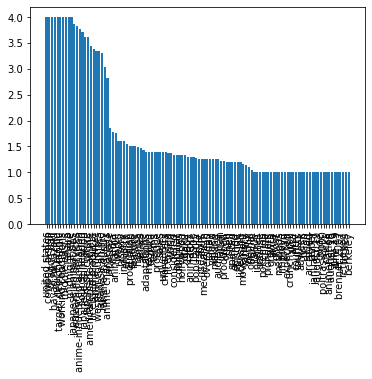

In [21]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

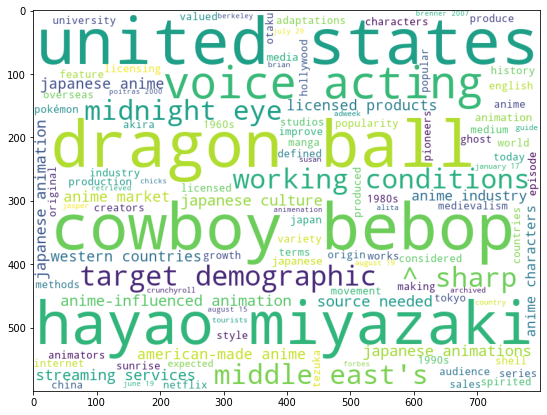

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

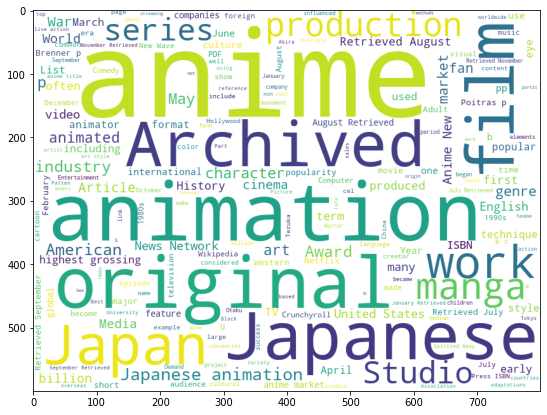

In [23]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [27]:
wc.generate(text).to_file('ds_wordcloud1.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as `Retrieved on`). Also, we get fewer keywords that consist of two words, such as *data scientist*, or *computer science*. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.

In our course we will discuss all those steps in detail. 